## Homework 2

## <em>Intro to Data Analysis, Dimensionality Reduction, and Clustering</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

***


### Imports

In [1]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

***

#### Problem 1 - Fitting Gaussian Contours to a 2D Data

Gaussian distribution function plays a central role in statistics and is the most ubiquitous distribution in physics. It often provides a good approximation to the true probability density function (pdf) even in cases where its application is not strictly correct. <br><br>
In this problem, suppose that you have measured 1000 pairs of values $(x_1, y_1), ... , (x_{1000}, y_{1000})$ of two variables $x, y$. You saved these measurements to a .dat file ("Problem1_data.dat"). Plot their 1-dimensional pdf's and determine how well Gaussian pdf can approximate them. Compute the mean, variance, median, mode, 68% and 95% confidence intervals, and correlation coefficient.

<span style="color:blue"><i> 1. Plot 1-dimensional pdf for $x$. </i></span> <br>

In [137]:
# Load a given 2D data
data = np.loadtxt("Problem1_data.dat")
x = data[:,0]
y = data[:,1]

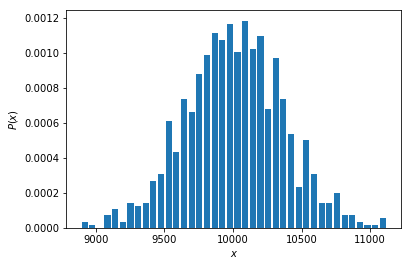

In [12]:
# Plot a normalized histogram (Hint - https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html)

# Having 25 elements per each bin
N = len(x); n = int(N/25)
# Make plot
plt.hist(x, bins = n, histtype = 'bar', normed = True, rwidth = 0.8)
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.show()

<span style="color:blue"> <i> 2. Calculate mean, variance, and median of $x$. First, do it "by hand" without using any in-built functions. Then, check your answers using in-built functions from numpy. </i></span>

In [34]:
# Calculating "by hand"
mean_x = sum(x)/len(x)
variance_x = sum((x-mean_x)**2)/len(x)

x_sorted = sorted(x)
if len(x)%2 == 0:
    median_x = (x_sorted[int( (len(x)/2)-1 )] + x_sorted[int( (len(x)/2) )])/2.
else:
    median_x =  x_sorted[int( np.floor(len(x)/2) )]

print("For x, mean = ", mean_x, ", variance = ", variance_x, ", and median = ", median_x)

# Using in-built functions from numpy
mean_x = np.mean(x)
variance_x = np.var(x)
median_x = np.median(x)

print("For x, mean = ", mean_x, ", variance = ", variance_x, ", and median = ", median_x)

For x, mean =  10011.5939237 , variance =  125445.68122 , and median =  10011.8167321
For x, mean =  10011.5939237 , variance =  125445.68122 , and median =  10011.8167321


<span style="color:blue"> <i> 3. Smoothly interpolate the discrete probability density from Part 1. Then, find the mode and symmetric 68%, 95% confidence intervals. (Suggestion - https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html)</i></span><br><br>
(Hint - For 68% confidence interval, find the range where 68% of the given sample occurs. We assume that such interval is symmetrically placed around the mean. <br>
In other words, find $a$ such taht
$$ 0.68 = \int_{\mu-a}^{\mu+a} P(x) $$
where $P(x)$ is $x$'s pdf, and $\mu$ is the mean.<br>
One way to find $a$ is to define a cumulative distribution function (cdf) $G(x)$ and find $a$ such that $G(\mu+a)-G(\mu-a) = .68$.)

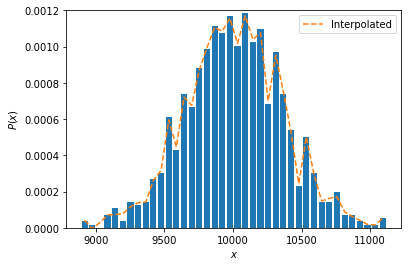

In [89]:
from scipy.interpolate import UnivariateSpline

p, xvar = np.histogram(x, bins = n, normed = True)
# Find x values at the center of each bin (call it xvar)
xvar = xvar[:-1] + (xvar[1] - xvar[0])/2

# Find the interpolated function f
f = UnivariateSpline(xvar, p, s=n)
# Change the amount of smoothing
f.set_smoothing_factor(1.e-8)

# Plot both histogram and interpolated function
plt.hist(x, bins = n, histtype = 'bar', normed = True, rwidth = 0.8)
plt.plot(xvar, f(xvar), '--', label = "Interpolated")
plt.ylim(0, 0.0012)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.show()

For x, mode =  10089.1802887


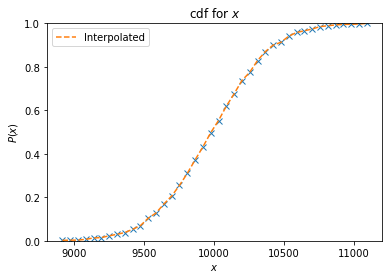

For x, 68% confidence interval is 10011.5939237 ± 346.391089604 and 95% interval is 10011.5939237 ± 713.501891623


In [122]:
# Find the mode
mode_x = xvar[np.argmax(f(xvar))]

print("For x, mode = ", mode_x)

# Find 68% and 95% confidence intervals

# Define the cdf
p, xvar = np.histogram(x, bins = n, normed = True)
delta_xvar = (xvar[1] - xvar[0])
cdf = p*delta_xvar
for i in range(len(cdf))[1:]:
    cdf[i] = cdf[i-1] + cdf[i]
xvar = xvar[:-1] + (xvar[1] - xvar[0])/2

# Interpolation
cdf_interpolated = UnivariateSpline(xvar, cdf, s=n)
cdf_interpolated.set_smoothing_factor(0)

# Plot the cdf (Optional)
plt.plot(xvar, cdf, 'x')
plt.plot(xvar, cdf_interpolated(xvar), '--', label = "Interpolated")
plt.ylim(0, 1)
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.title('cdf for $x$')
plt.legend()
plt.show()

# Write a function which computes the confidence interval
def findinterval(f, percentage):    
    delta_x = np.sqrt(variance_x)/2000
    testx = np.append( np.arange(mean_x-3*np.sqrt(variance_x), mean_x, delta_x), np.arange(mean_x, mean_x+3*np.sqrt(variance_x), delta_x) )

    ind = int(len(testx)/2)

    for i in range(int(len(testx)/2)):
        if cdf_interpolated(testx[ind+i])-cdf_interpolated(testx[ind-i]) > percentage:
            val = testx[ind+i] - testx[ind]
            break
    return val

print("For x, 68% confidence interval is", mean_x, "±", findinterval(cdf_interpolated, .68), 
      "and 95% interval is", mean_x, "±", findinterval(cdf_interpolated, .95))

Assuming that the distribution is Gaussian, 68% and 95% confidence interval corresponds to $\mu \pm 1\sigma$ and $\mu \pm 2\sigma$.  </i></span>

In [85]:
print("Assuming Gaussian distribution, 68% confidence interval is", mean_x, "±", np.sqrt(variance_x), 
     ", and 95% interval is", mean_x, "±", 2*np.sqrt(variance_x))

Assuming Gaussian distribution, 68% confidence interval is 10011.5939237 ± 354.183118204 , and 95% interval is 10011.5939237 ± 708.366236407


You should find that the Gaussian distribution is a reasonable approximation in this case.

<span style="color:blue"> <i> 4. Plot Gaussian distribution with the mean and variance from Part 1 on top of probability density histogram. Make sure to label each plot. </i></span>

In [124]:
# Define Gaussian distribution
def gaussian(x, mu, sigma):
    return 1./np.sqrt(2*np.pi*sigma**2)*np.exp(-((x-mu)**2)/(2*sigma**2))

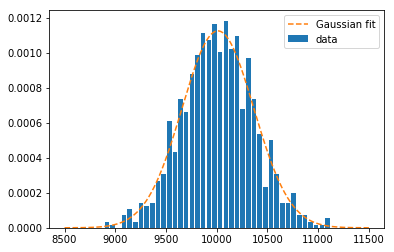

In [129]:
# Plot histogram
plt.hist(x, bins = n, histtype = 'bar', normed = True, rwidth = 0.8, label = 'data')
# Plot Gaussian
x_gaussian = np.linspace(8500, 11500, 1000)
plt.plot(x_gaussian, gaussian(x_gaussian, mean_x, np.sqrt(variance_x)), '--', label = 'Gaussian fit')
plt.legend()
plt.show()


<span style="color:blue"> <i> 5. Repeat part 1-4 for $y$.  </i></span>

For y, mean =  25.8254055957 , variance =  339007.305156 , and median =  32.1687289605


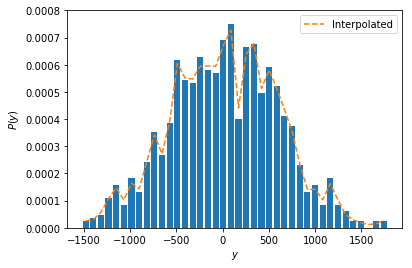

For y, mode =  88.5992080278
For y, 68% confidence interval is 25.8254055957 ± 578.167635069 and 95% interval is 25.8254055957 ± 1158.66424349


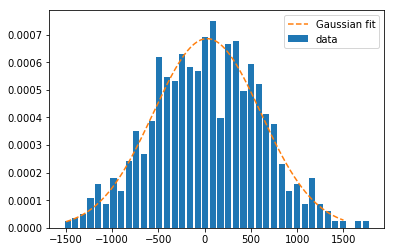

In [135]:
N = len(y); n = int(N/25)

# Calculating "by hand"
mean_y = sum(y)/len(y)
variance_y = sum((y-mean_y)**2)/len(y)

y_sorted = sorted(y)
if len(y)%2 == 0:
    median_y = (y_sorted[int( (len(y)/2)-1 )] + y_sorted[int( (len(y)/2) )])/2.
else:
    median_y =  y_sorted[int( np.floor(len(y)/2) )]

print("For y, mean = ", mean_y, ", variance = ", variance_y, ", and median = ", median_y)

p, yvar = np.histogram(y, bins = n, normed = True)
# Find y values at the center of each bin (call it yvar)
yvar = yvar[:-1] + (yvar[1] - yvar[0])/2

# Find the interpolated function f
f = UnivariateSpline(yvar, p, s=n)
# Change the amount of smoothing
f.set_smoothing_factor(1.e-8)

# Plot both histogram and interpolated function
plt.hist(y, bins = n, histtype = 'bar', normed = True, rwidth = 0.8)
plt.plot(yvar, f(yvar), '--', label = "Interpolated")
plt.ylim(0, 0.0008)
plt.legend()
plt.xlabel('$y$')
plt.ylabel('$P(y)$')
plt.show()

# Find the mode
mode_y = yvar[np.argmax(f(yvar))]

print("For y, mode = ", mode_y)

# Find 68% and 95% confidence intervals

# Define the cdf
p, yvar = np.histogram(y, bins = n, normed = True)
delta_yvar = (yvar[1] - yvar[0])
cdf = p*delta_yvar
for i in range(len(cdf))[1:]:
    cdf[i] = cdf[i-1] + cdf[i]
yvar = yvar[:-1] + (yvar[1] - yvar[0])/2

# Interpolation
cdf_interpolated = UnivariateSpline(yvar, cdf, s=n)
cdf_interpolated.set_smoothing_factor(0)

# Write a function which computes the confidence interval
def findinterval(f, percentage):    
    delta_y = np.sqrt(variance_y)/2000
    testy = np.append( np.arange(mean_y-3*np.sqrt(variance_y), mean_y, delta_y), np.arange(mean_y, mean_y+3*np.sqrt(variance_y), delta_y) )

    ind = int(len(testy)/2)

    for i in range(int(len(testy)/2)):
        if cdf_interpolated(testy[ind+i])-cdf_interpolated(testy[ind-i]) > percentage:
            val = testy[ind+i] - testy[ind]
            break
    return val

print("For y, 68% confidence interval is", mean_y, "±", findinterval(cdf_interpolated, .68), 
      "and 95% interval is", mean_y, "±", findinterval(cdf_interpolated, .95))

# Plot histogram
plt.hist(y, bins = n, histtype = 'bar', normed = True, rwidth = 0.8, label = 'data')
# Plot Gaussian
y_gaussian = np.linspace(-1500, 1500, 1000)
plt.plot(y_gaussian, gaussian(y_gaussian, mean_y, np.sqrt(variance_y)), '--', label = 'Gaussian fit')
plt.legend()
plt.show()

<span style="color:blue"> <i> 6. Make a 2-d scatter plot with Gaussian contours (ellipses). Then, compute the covariance ($C_{xy}$) of $x$ and $y$ as well as the correlation coefficient $\rho = \frac{C_{xy}}{\sigma_{x}\sigma_{y}}$.  </i></span>

The covariance between x and y is 166453.760119
The correlation coefficient of x and y is 0.807162960615


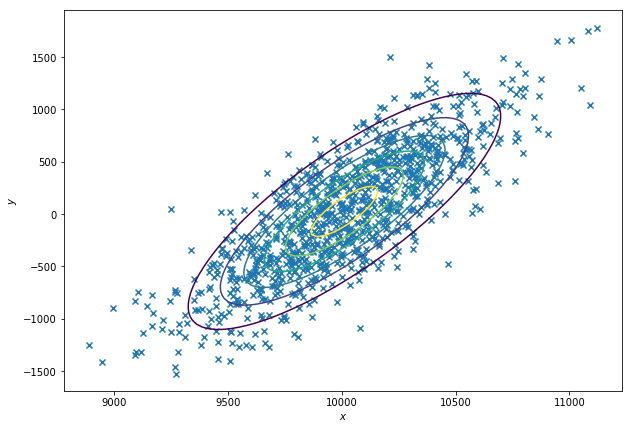

In [140]:
# Compute the covariance and correlation coefficient
cov = 0
for i in range(len(x)):
    cov += (x[i]-np.mean(x))*(y[i]-np.mean(y))
cov = cov/len(x)

print("The covariance between x and y is", cov)

print("The correlation coefficient of x and y is", cov/np.sqrt(variance_x*variance_y))

# Make a 2-d scatter plot with Gaussian contours

import matplotlib.mlab as mlab

# Create coordinate matrices from coordinate vectors.
gridx = np.linspace(9000, 11000, 100)
gridy = np.linspace(-1500, 1500, 100)
X, Y = np.meshgrid(gridx, gridy)

# Create bivariate Gaussian distribution for equal shape X, Y (https://matplotlib.org/api/mlab_api.html)
Z = mlab.bivariate_normal(X, Y, np.sqrt(variance_x), np.sqrt(variance_y), mean_x, mean_y, cov)

# Make plot
plt.figure(figsize = (10, 7))
# Scatter plot
plt.scatter(x, y, marker = 'x')
# Gaussian contour plots
plt.contour(X, Y, Z)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


The above contour plot is a bird eye view of the 3-d mesh plot; these are ellipses of equal probability. The coloring represents the intensity. Yellow central ellipse is the region of highest probability; the peak of 2-d Gaussian distribution is at the center of this ellipse. As we move away from the peak, the probability lowers.

***

#### Problem 2 - Central Limit Theorem

Plot the binomial distribution $P(N_A, N)$ for different values of $N$ and plot the Gaussian with mean and variance for the binomial. Similarly, plot the Poisson distribution with the mean varying from 1 to 10. See if both binomial and Poisson approach Gaussian as the mean/$N$ increases.<br><br>
(Reference - Kardar p. 41) For the binomial distribution, consider a random variable with two outcomes $A$ and $B$ of relative probabilities $p_A$ and $p_B = 1 - p_A$. The probability that in $N$ trials the event $A$ occurs exactly $N_A$ times is given by the binomial distribution:
$$ p_N(N_A) = \binom{N}{N_A} p_A^{N_A}(1-p_A)^{N-N_A}. $$
<br>
<span style="color:blue"> <i> 1. Plot the binomial distribution $P(N_A, N)$ for $N = 5, 20, 40, 100, 300$ and plot the Gaussian with mean and variance for the binomial. Let $p_A = 0.5$ and $0.1$. Make sure to label each plot.  </i></span>

In [147]:
# Import packages for the bionomial coefficient
from scipy.special import binom

# Define the probability for the binomial distribution
def pdf_binom(p_A, N, N_A):
    return binom(N, N_A)*(p_A**N_A)*((1-p_A)**(N-N_A))

# Define Gaussian distribution
def gaussian(x, mu, sigma):
    return 1./np.sqrt(2*np.pi*sigma**2)*np.exp(-((x-mu)**2)/(2*sigma**2))

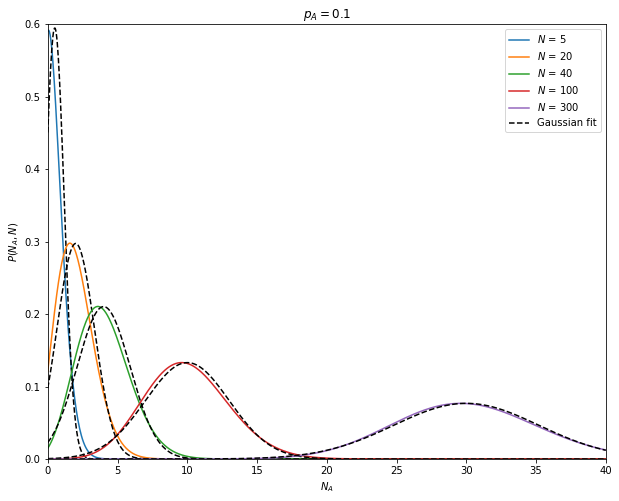

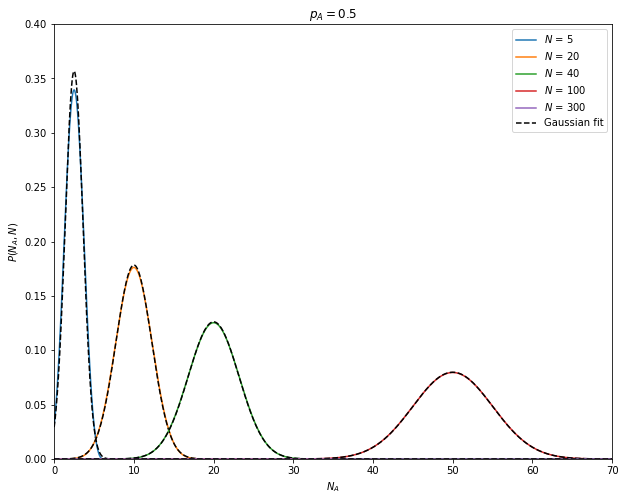

In [155]:
N = [5, 20, 40, 100, 300]
N_A = np.linspace(0, 40, 1000)

# Make plot
plt.figure(figsize= (10, 8))

# For p_A = 0.1
p_A = 0.1
for i in range(len(N)):
    plt.plot(N_A, pdf_binom(p_A, N[i], N_A), label = '$N$ = %d' %N[i])
    if i == len(N)-1:
        plt.plot(N_A, gaussian(N_A, N[i]*p_A, np.sqrt(N[i]*p_A*(1-p_A))), 'k--', label = 'Gaussian fit')
    else:
        plt.plot(N_A, gaussian(N_A, N[i]*p_A, np.sqrt(N[i]*p_A*(1-p_A))), 'k--')
plt.xlim(0, 40)
plt.ylim(0, 0.6)
plt.xlabel('$N_A$')
plt.ylabel('$P(N_A, N)$')
plt.legend()
plt.title('$p_A = 0.1$')
plt.show()

N_A = np.linspace(0, 70, 1000)
plt.figure(figsize= (10, 8))
# For p_A = 0.5
p_A = 0.5
for i in range(len(N)):
    plt.plot(N_A, pdf_binom(p_A, N[i], N_A), label = '$N$ = %d' %N[i])
    if i == len(N)-1:
        plt.plot(N_A, gaussian(N_A, N[i]*p_A, np.sqrt(N[i]*p_A*(1-p_A))), 'k--', label = 'Gaussian fit')
    else:
        plt.plot(N_A, gaussian(N_A, N[i]*p_A, np.sqrt(N[i]*p_A*(1-p_A))), 'k--')
plt.xlim(0, 70)
plt.ylim(0, 0.4)
plt.xlabel('$N_A$')
plt.ylabel('$P(N_A, N)$')
plt.legend()
plt.title('$p_A = 0.5$')
plt.show()

In class, we find that the binomial distribution is approximately normal (with mean $Np_A$ and variance $Np_A(1-p_A)$) as $N \rightarrow \infty$, by the central limit theorem. The proof of this theorem can be carried out using Stirling's approximation:
$$ N! \approx N^N e^{-N}\sqrt{2\pi N} $$
<br>
<span style="color:blue"><i> 2. Plot the above Stirling's formula approximation (i.e. Compare $N!$ with Stirling's approximation. Compute the residual: (actual-estimate)/actual.) </i></span><br>
(Hint: $\Gamma(n+1) = n!$)


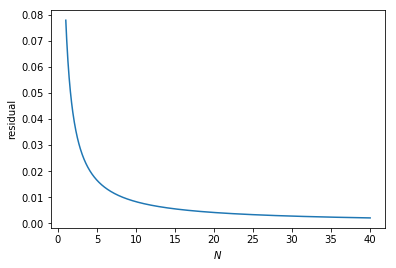

In [235]:
from scipy.special import gamma

Nvals = np.linspace(1, 40, 1000)

actual = gamma(Nvals+1)
estimate = np.sqrt(2*np.pi)*Nvals**(Nvals+0.5)*np.exp(-Nvals)

plt.plot(Nvals, (actual-estimate)/actual)
plt.xlabel('$N$')
plt.ylabel('residual')
plt.show()

You should find that residual $\rightarrow 0$ as $N \rightarrow \infty$.

Next, consider the Poisson distribution (Kardar p. 42):
$$ P(\lambda) = \frac{\lambda^k e^{-\lambda}}{k!} $$
where $k$ is the number of occurrences. Its mean and variance are $\lambda$.<br><br>
<span style="color:blue"> <i> 3. Plot $P(\lambda)$ as a function of $k$ for $\lambda = 1, 3, 5, 10, 20$ and plot the Gaussian with mean and variance for the Poisson. Make sure to label. </i></span><br>

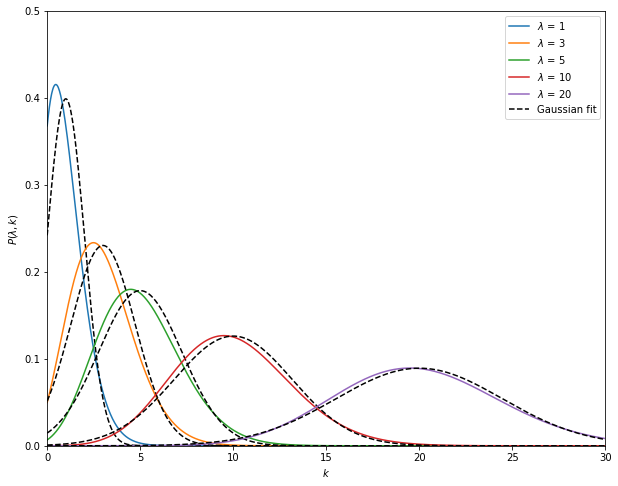

In [163]:
# Define the Poisson distribution
def poisson(L, k):
    return (L**k)*np.exp(-L)/(gamma(k+1))

L = [1, 3, 5, 10, 20]
k = np.linspace(0, 30, 1000)

# Make plot
plt.figure(figsize= (10, 8))

for i in range(len(L)):
    plt.plot(k, poisson(L[i], k), label = '$\lambda$ = %d' %L[i])
    if i == len(L)-1:
        plt.plot(k, gaussian(k, L[i], np.sqrt(L[i])), 'k--', label = 'Gaussian fit')
    else:
        plt.plot(k, gaussian(k, L[i], np.sqrt(L[i])), 'k--')
plt.xlim(0, 30)
plt.ylim(0, 0.5)
plt.xlabel('$k$')
plt.ylabel('$P(\lambda, k)$')
plt.legend()
plt.show()

<span style="color:blue"> <i> 4. What happens as the mean/$N$ increases? </i></span><br>

<span style="color:blue"><i> Answer: </i></span><br>
Both binomial and Poisson distributions becomes approximately normal as the mean/$N$ increases.

***

#### Problem 3 - Fitting Data to a Straight Line (Linear Regression)

(Reference - NR 15.2) We fit a set of 50 data points $(x_i, y_i)$ to a straight-line model $y(x) = a + bx$. The uncertainty $\sigma_i$ associated with each measurement $y_i$ is known, and we assume that the $x_i$'s are known exactly. To measure how well the model agrees with the data, we use the chi-square merti function: <br>
$$ \chi^2(a,b) = \sum_{i=0}^{N-1} \big( \frac{y_i-a-bx_i}{\sigma_i} \big)^2. $$
<br>
Make a scatter plot of data (including uncertainties) and find the best-fit line. Compute the errors on the two parameters $a$ and $b$ and plot lines where the two are changed by $\pm 1\sigma$.

<br>
<span style="color:blue"> <i> 1. Plot data (make sure to include error bars). (Hint - https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.errorbar.html) </i></span><br>

In [166]:
# Load a given 2D data
data = np.loadtxt("Problem3_data.dat")
x = data[:,0]
y = data[:,1]
sig_y = data[:,2]

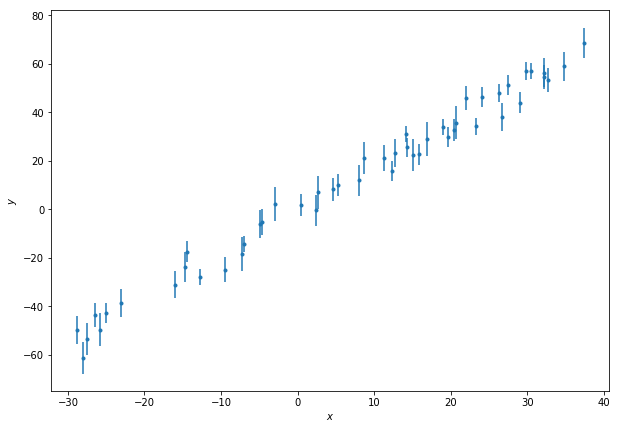

In [167]:
# Make plot
plt.figure(figsize = (10, 7))
# Scatter plot
plt.errorbar(x, y, yerr = sig_y, fmt='.')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

(NR p. 781) We should minimize the above chi-square function to determine $a$ and $b$. At its minimum, derivatives of $\chi^2$ with respect to $a, b$ vanish:
$$ \frac{\partial{\chi^2}}{\partial{a}} = -2 \sum \frac{y_i - a - bx_i}{\sigma_i^2} = 0 \ \ \ \ \ \ \ \ \ \ \ \ (1) $$
$$ \frac{\partial{\chi^2}}{\partial{b}} = -2 \sum \frac{x_i(y_i - a - bx_i)}{\sigma_i^2} = 0   \ \ \ \ \ \ \ \ \ (2) $$
<br>
These conditions can be rewritten in a convenient form if we define the following sums:
$$ S = \sum \frac{1}{\sigma_i^2},\ S_x = \sum \frac{x_i}{\sigma_i^2},\ S_y = \sum \frac{y_i}
{\sigma_i^2} $$
$$ S_{xx} = \sum \frac{x_i^2}{\sigma_i^2},\ S_{xy} = \sum \frac{x_iy_i}{\sigma_i^2} $$
<br> With these, we can rewrite (1), (2) as:
$$ a*S + b*S_x = S_y $$
$$ a*S_x + b*S_{xx} = S_{xy} $$
<br> The solution to these is calculated as:
$$ \Delta = SS_{xx} - (S_x)^2 $$ <br>
$$ a = \frac{S_{xx}S_y - S_xS_{xy}}{\Delta} $$
$$ b = \frac{SS_{xy} - S_xS_y}{\Delta} $$
<br><span style="color:blue"><i> 2. Find parameters $a, b$ which minimize the chi-square function and plot the best-fit line on top of the data. </i></span><br>

In [176]:
S = sum(sig_y**(-2))
Sx = sum(x*sig_y**(-2))
Sy = sum(y*sig_y**(-2))
Sxx = sum((x**2)*sig_y**(-2))
Sxy = sum(x*y*sig_y**(-2))
Delta = S*Sxx - Sx**2

In [212]:
a = (Sxx*Sy - Sx*Sxy)/Delta
b = (S*Sxy - Sx*Sy)/Delta

xx = np.linspace(-35, 45, 100)
y_fit = a + b*xx

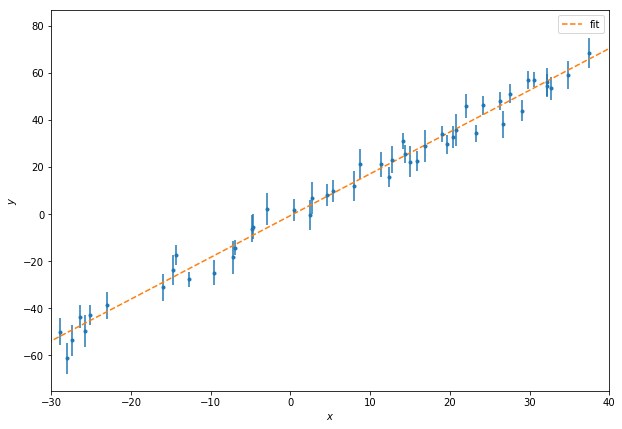

In [217]:
# Make plot
plt.figure(figsize = (10, 7))
plt.errorbar(x, y, yerr = sig_y, fmt='.')
plt.plot(xx, y_fit, '--', label = 'fit')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-30, 40)
plt.legend()
plt.show()

Now, we must estimate the probable uncertainties in the estimates of $a$ and $b$, since obviously the measurement errors in the data must introduce some uncertainty in the determination of those parameters. If the data are independent, then each contributes its own bit of uncertainty to the parameters. Consideration of propagation of errors show that the variance $\sigma_f^2$ in the value of any function will be 
$$ \sigma_f^2 = \sum \sigma_i^2 (\frac{\partial f}{\partial y_i})^2 $$
<br> For the straight line, the derivatives of $a$ and $b$ with respect to $y_i$ can be directly evaluated from teh solution:
$$ \frac{\partial a}{\partial y_i} = \frac{S_{xx}-S_x x_i}{\sigma_i^2 \Delta} $$
$$ \frac{\partial b}{\partial y_i} = \frac{S x_i-S_x}{\sigma_i^2 \Delta} $$
<br> Summing over the points, we get
$$ \sigma_a^2 = S_{xx}/\Delta $$
$$ \sigma_b^2 = S/\Delta $$

<span style="color:blue"> <i> 3. Compute the errors ($\sigma_a, \sigma_b$) on the two parameters $a, b$ and plot lines where the two are changed by $\pm 1\sigma$.</i></span><br>
(Hint - You can use plt.fill_between to shade the region between plots.)

In [223]:
# Calculate sigma_a, sigma_b

a = (Sxx*Sy - Sx*Sxy)/Delta
b = (S*Sxy - Sx*Sy)/Delta

sigma_a = np.sqrt(Sxx/Delta)
sigma_b = np.sqrt(S/Delta)

print('We estimate that a =', a ,"±", sigma_a, "and b =", b, "±", sigma_b)

We estimate that a = -0.595230946639 ± 0.752865780441 and b = 1.77469658755 ± 0.0362401212361


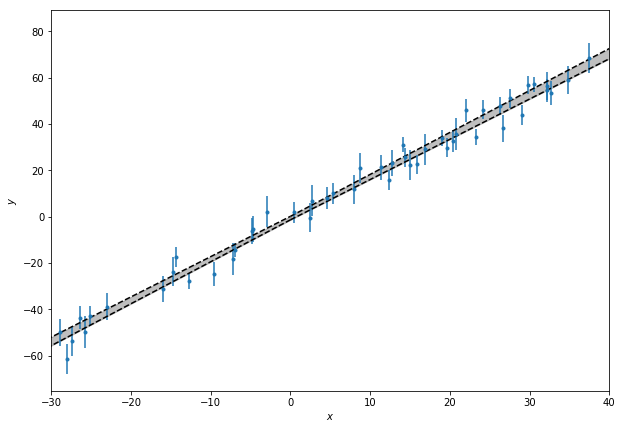

In [234]:
plt.figure(figsize = (10, 7))
plt.errorbar(x, y, yerr = sig_y, fmt='.', label = 'data')

xx1 = np.linspace(-35, 0, 100)
y_fit1 = (a+sigma_a) + (b-sigma_b)*xx1
y_fit2 = (a-sigma_a) + (b+sigma_b)*xx1

xx2 = np.linspace(0, 45, 100)
y_fit3 = (a+sigma_a) + (b+sigma_b)*xx2
y_fit4 = (a-sigma_a) + (b-sigma_b)*xx2

plt.plot(xx1, y_fit1, 'k--')
plt.plot(xx1, y_fit2, 'k--')
plt.plot(xx2, y_fit3, 'k--')
plt.plot(xx2, y_fit4, 'k--')
plt.fill_between(xx1, y_fit1, y_fit2, color='grey', alpha='0.5')
plt.fill_between(xx2, y_fit3, y_fit4, color='grey', alpha='0.5')


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-30, 40)
plt.legend()
plt.show()

***

#### Problem 4 - UMAP + clustering

Yann LeCun and collaborators collected and processed  70,000  handwritten digits to produce what became known as the most widely used database in ML, called MNIST. Each handwritten digit comes in a square image, divided into a  28×28  pixel grid. Every pixel can take on  256  nuances of the gray color, interpolating between white and black, and hence each the data point assumes any value in the set  {0,1,…,255}. There are  10  categories in the problem, corresponding to the ten digits.

Ever since, the MNIST problem has become an important standard for benchmarking the performance of more sophisticated Machine Learning models. Often times, there are contests for finding a new constellation of hyperparameters and/or model architecture which results in a better accuracy for correctly classifying the digits.

In [2]:
from sklearn import datasets

mnist = datasets.fetch_mldata('MNIST original')

# Load MNIST data
X = mnist.data
Y = mnist.target

/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


"$X$" contains information about the given MNIST digits. We have a 28x28 pixel grid, so each image is a vector of length 784; we have 70,000 images (digits), so $X$ is a 70,000x784 matrix. "$Y$" is a label (0-9; the category to which each image belongs) vector of length 70,000.

<span style="color:blue"> <i> 1. Do the following:

(1) Randomly shuffle data (i.e. randomize the order)

  (Note: The label $Y_1$ corresponds to a vector $X_{1j}$, and even after shuffling, $Y_1$ should still correspond to $X_{1j}$.)
  
  
(2) Select only 20% of the data. (due to memory issues; if your code keeps crashing, you can go down to 10%.)


(3) Split data into training and test samples using train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Set train_size = 0.8. (80% of $X$ is our training samples.) Print the dimension of training and test samples. </i></span> <br>

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

# shuffle data
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
Y = Y[permutation]
X = X.reshape((X.shape[0], -1))

# pick training and test data sets 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)

# Select only 20% of data
X_train = X_train[::5]
X_test = X_test[::5]
Y_train = Y_train[::5]
Y_test = Y_test[::5]

print( np.shape(X_train), np.shape(Y_train) )
print( np.shape(X_test), np.shape(Y_test) )

(11200, 784) (11200,)
(2800, 784) (2800,)


<span style="color:blue"> <i> 2. Choose any five images and show what they look like. Also, print the corresponding label to each image. </i></span> <br>

Hint: each image is a vector of length 784. So reshape it into a 28x28 matrix.

&nbsp; **X_0 = X_train[0]** <br>
&nbsp; **X_0 = X_0.reshape((28, 28))**
  
Then, make a plot using imshow

&nbsp; **plt.imshow(X_0, cmap=plt.cm.gray)**

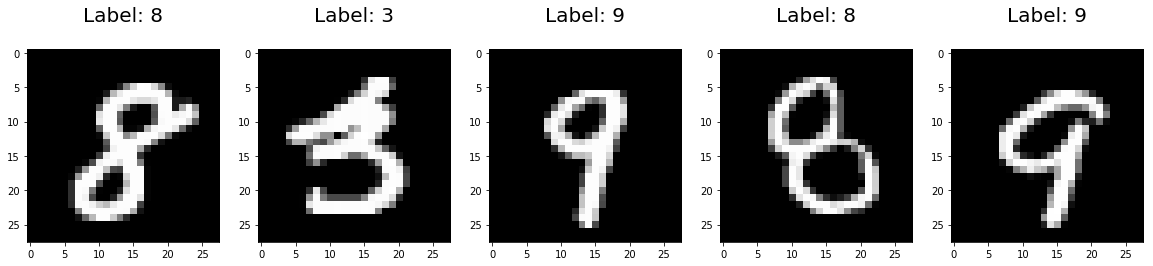

In [4]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], Y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Label: %i\n' % label, fontsize = 20)

The following exercises are taken from the tutorial here: https://umap-learn.readthedocs.io/en/latest/index.html. Please go through them if you want to learn more about the umap package.

**UMAP** (Uniform Manifold Approximation and Projection for Dimension Reduction) is a general purpose manifold learning and dimension reduction algorithm. It is designed to be compatible with scikit-learn, making use of the same API and able to be added to sklearn pipelines. If you are already familiar with sklearn you should be able to use UMAP as a drop in replacement for t-SNE and other dimension reduction classes.

In [5]:
import umap

While UMAP can be used for standard unsupervised dimension reduction the algorithm offers significant flexibility allowing it to be extended to perform other tasks, including making use of categorical label information to do supervised dimension reduction, and even metric learning.

Let's use labels ("$Y$") to do supervised learning.

How do we go about coercing UMAP to make use of target labels? If you are familiar with the sklearn API you’ll know that the fit() method (here, you can think of "fitting" as "training.") takes a target parameter y that specifies supervised target information (for example when training a supervised classification model). We can simply pass the UMAP model that target data when fitting and it will make use of it to perform supervised dimension reduction!

First, define your UMAP model:

&nbsp; **model = umap.UMAP()**

Then, using "fit_transform," fit your training sample into an embedded space, with the target array ("Y") for supervised dimension reduction specified.

&nbsp; **embedding_train = model.fit_transform(training X data, training Y label)**

You can use this trained model to transform new data - which is "test data" in this case.

&nbsp; **embedding_test = model.transform(test X data)**

By default, data has reduced down to 2 dimensions. (i.e. embedding_test will have dimensions = (# of test data, 2) - it is an array with test samples, but with 2 feature columns. Each row of the array is a 2-dimensional representation of the corresponding digit.) Thus we can plot the embedding as a standard scatterplot and color by the target array (since it applies to the transformed data which is in the same order as the original).

&nbsp; **plt.scatter(embedding[:, 0], embedding[:, 1], ...)**

<span style="color:blue"> <i> 3. Do the supervised learning and create scatterplots for both training and test data. Color data points according to the corresponding target array $Y$. Make sure to label all 10 classes. Are they cleanly separated?</i></span> <br>


In [13]:
# supervised mode

reducer_s = umap.UMAP()
embedding_s0 = reducer_s.fit_transform(X_train, Y_train)
embedding_s1 = reducer_s.transform(X_test)

/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda/envs/testnbkit/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda/envs/testnbkit/lib/python3.6/site-packages/umap/nndescent.py"

In [14]:
import seaborn as sns
sns.set(context="paper", style="white")

In [15]:
classes = [
    '0',
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9']

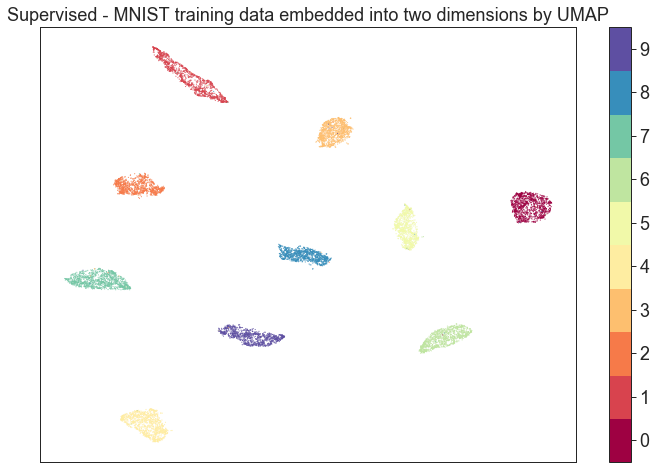

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
color = Y_train.astype(int)
plt.scatter(
    embedding_s0[:, 0], embedding_s0[:, 1], c=color, cmap="Spectral", s=0.1
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Supervised - MNIST training data embedded into two dimensions by UMAP", fontsize=18)
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.ax.tick_params(labelsize=18)
cbar.set_ticklabels(classes)

plt.show()

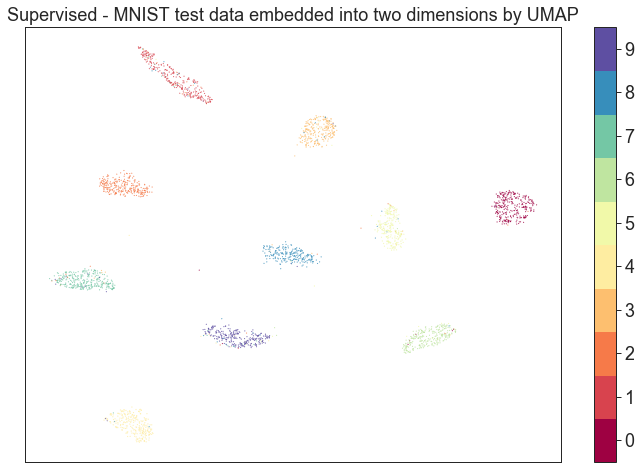

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
color = Y_test.astype(int)
plt.scatter(
    embedding_s1[:, 0], embedding_s1[:, 1], c=color, cmap="Spectral", s=0.1
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Supervised - MNIST test data embedded into two dimensions by UMAP", fontsize=18)
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.ax.tick_params(labelsize=18)
cbar.set_ticklabels(classes)

plt.show()

UMAP has several hyperparameters that can have a significant impact on the resulting embedding: n_neighbors, min_dist, n_components, and metric. (https://umap-learn.readthedocs.io/en/latest/parameters.html)

Each of these parameters has a distinct effect, and we will look at n_neighbors and n_components.

**n_neighbors** controls how UMAP balances local versus global structure in the data. It does this by constraining the size of the local neighborhood UMAP will look at when attempting to learn the manifold structure of the data. This means that low values of n_neighbors will force UMAP to concentrate on very local structure (potentially to the detriment of the big picture), while large values will push UMAP to look at larger neighborhoods of each point when estimating the manifold structure of the data, losing fine detail structure for the sake of getting the broader of the data.

We can see that in practice by fitting our dataset with UMAP using a range of n_neighbors values. The default value of n_neighbors for UMAP (as used above) is 15.

<span style="color:blue"> <i> 4. Choose n_neighbors=2,200. What happens as we increase n_neighbors? </i></span> <br>


In [11]:
reducer_s = umap.UMAP(n_components=2, n_neighbors=2, random_state=42)
embedding_s0 = reducer_s.fit_transform(X_train, Y_train)

reducer_s1 = umap.UMAP(n_components=2, n_neighbors=200, random_state=42)
embedding_s01 = reducer_s1.fit_transform(X_train, Y_train)

/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda/envs/testnbkit/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 1065 separate connected components using meta-embedding (experimental)
  n_components
/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connec

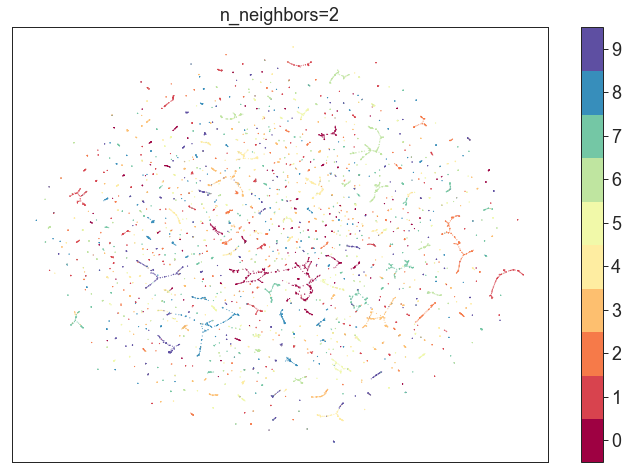

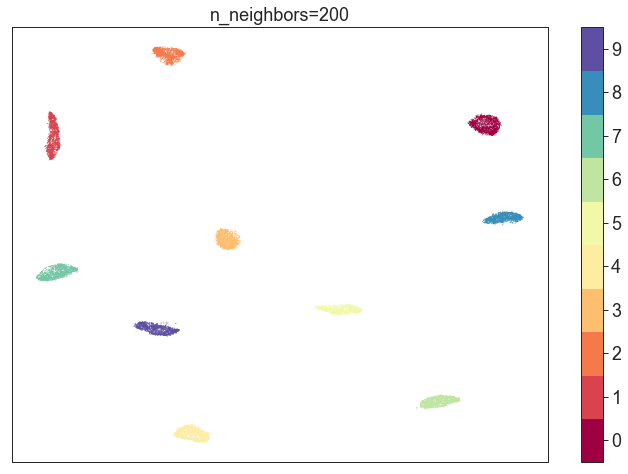

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
color = Y_train.astype(int)
plt.scatter(
    embedding_s0[:, 0], embedding_s0[:, 1], c=color, cmap="Spectral", s=0.1
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("n_neighbors=2", fontsize=18)
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.ax.tick_params(labelsize=18)
cbar.set_ticklabels(classes)

plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
color = Y_train.astype(int)
plt.scatter(
    embedding_s01[:, 0], embedding_s01[:, 1], c=color, cmap="Spectral", s=0.1
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("n_neighbors=200", fontsize=18)
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.ax.tick_params(labelsize=18)
cbar.set_ticklabels(classes)

plt.show()

With a value of n_neighbors=2 we see that UMAP merely glues together small chains, but due to the narrow/local view, fails to see how those connect together. It also leaves many different components (and even singleton points). This represents the fact that from a fine detail point of view the data is very disconnected and scattered throughout the space.

As n_neighbors is increased UMAP manages to see more of the overall structure of the data, gluing more components together, and better coverying the broader structure of the data. By the stage of n_neighbors=20 we have a fairly good overall view of the data showing how the various colors interelate to each other over the whole dataset.

As n_neighbors increases further more and more focus in placed on the overall structure of the data. This results in, with n_neighbors=200 a plot where the overall structure is well captured, but at the loss of some of the finer local sturcture.

***

As is standard for many scikit-learn dimension reduction algorithms UMAP provides a **n_components** parameter option that allows the user to determine the dimensionality of the reduced dimension space we will be embedding the data into. Unlike some other visualisation algorithms such as t-SNE UMAP scales well in embedding dimension, so you can use it for more than just visualisation in 2- or 3-dimensions.

For the purposes of this demonstration (so that we can see the effects of the parameter) we will only be looking at 1-dimensional and 3-dimensional embeddings, which we have some hope of visualizing.

First of all we will set n_components to 1, forcing UMAP to embed the data in a line. For visualisation purposes we will randomly distribute the data on the y-axis to provide some separation between points.

<span style="color:blue"> <i> 5. Choose n_components=1,3. Observe the scatterplots. </i></span> <br>

In [18]:
from mpl_toolkits.mplot3d import Axes3D

In [21]:
reducer_s = umap.UMAP(n_components=1)
embedding_s0 = reducer_s.fit_transform(X_train, Y_train)

reducer_s1 = umap.UMAP(n_components=3)
embedding_s01 = reducer_s1.fit_transform(X_train, Y_train)

/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda/envs/testnbkit/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda/envs/testnbkit/lib/python3.6/site-packages/umap/nndescent.py"

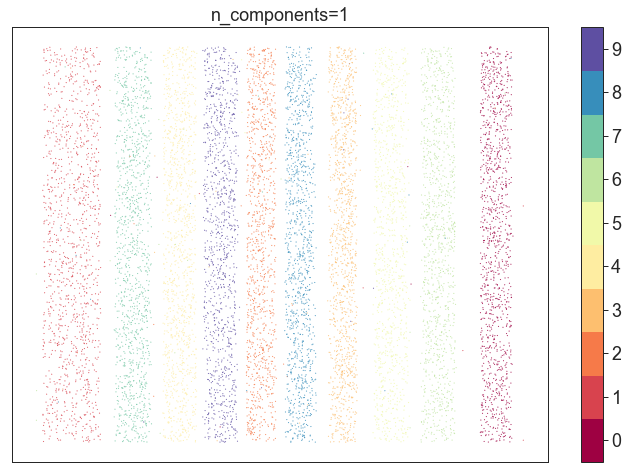

/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


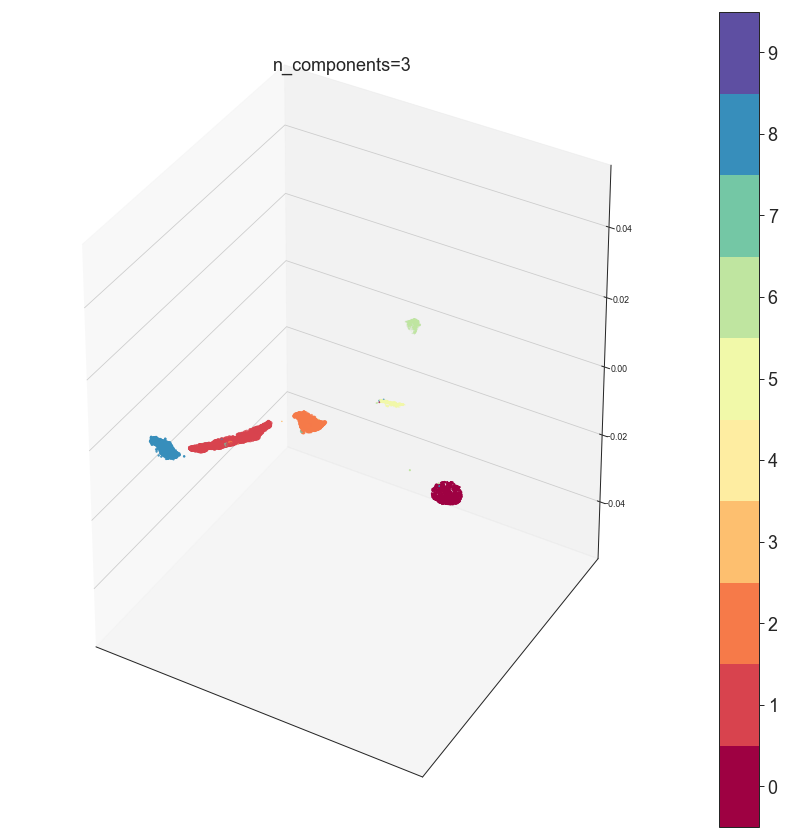

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
color = Y_train.astype(int)
plt.scatter(
    embedding_s0[:, 0], range(len(embedding_s0)), c=color, cmap="Spectral", s=0.1
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("n_components=1", fontsize=18)
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.ax.tick_params(labelsize=18)
cbar.set_ticklabels(classes)

plt.show()

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
color = Y_train.astype(int)
plt.scatter(
    embedding_s01[:, 0], embedding_s01[:, 1], embedding_s01[:, 2], c=color, cmap="Spectral"
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("n_components=3", fontsize=18)
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.ax.tick_params(labelsize=18)
cbar.set_ticklabels(classes)

plt.show()

UMAP is useful for generating visualisations, but if you want to make use of UMAP more generally for machine learning tasks it is important to be be able to train a model and then later pass new data to the model and have it transform that data into the learned space. For example if we use UMAP to learn a latent space and then train a classifier on data transformed into the latent space then the classifier is only useful for prediction if we can transform data for which we want a prediction into the latent space the classifier uses. Fortunately UMAP makes this possible, albeit more slowly than some other transformers that allow this.

To make use of UMAP as a data transformer we first need to fit the model with the training data. In this case we simply hand it the training data and it will learn an appropriate (two dimensional by default) embedding.

&nbsp; **model = umap.UMAP()**

&nbsp; **embedding_train_unsupervised = model.fit_transform(training X data)**

&nbsp; **embedding_test_unsupervised = model.transform(test X data)**

<span style="color:blue"> <i> 6. Do the unsupervised learning and create scatterplots for both training and test data. Color data points according to the corresponding target array $Y$. Make sure to label all 10 classes. Compared to Part 3, how did they perform? Also, has the test data been embedded into 2 dimensions in exactly the locations we should expect (by class) given the embedding of the training data? </i></span> <br>

In [23]:
reducer_s = umap.UMAP()
embedding_u0 = reducer_s.fit_transform(X_train)
embedding_u1 = reducer_s.transform(X_test)

/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda/envs/testnbkit/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda/envs/testnbkit/lib/python3.6/site-packages/umap/nndescent.py"

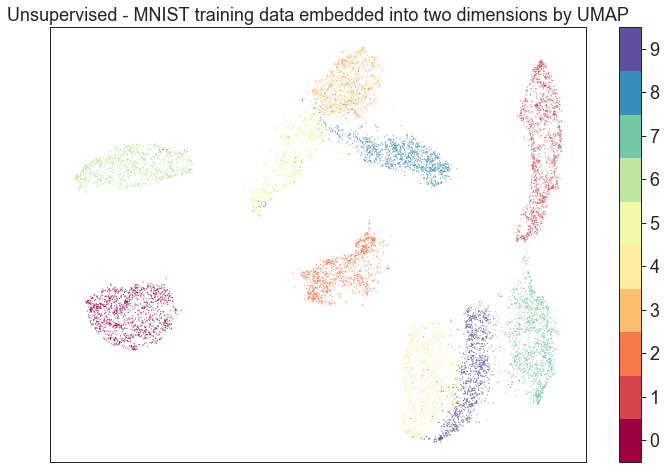

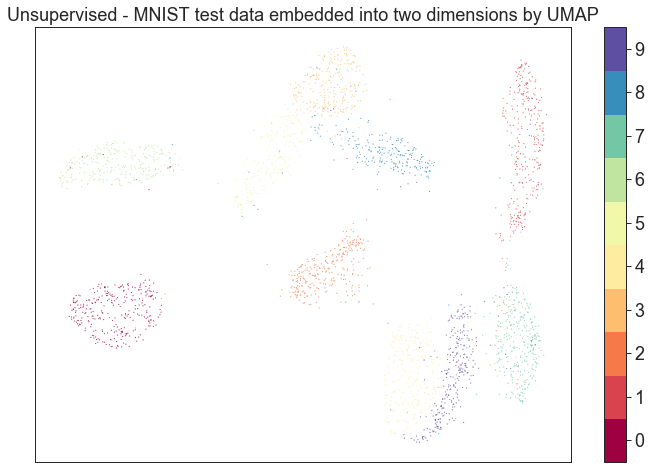

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
color = Y_train.astype(int)
plt.scatter(
    embedding_u0[:, 0], embedding_u0[:, 1], c=color, cmap="Spectral", s=0.1
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Unsupervised - MNIST training data embedded into two dimensions by UMAP", fontsize=18)
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.ax.tick_params(labelsize=18)
cbar.set_ticklabels(classes)

plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
color = Y_test.astype(int)
plt.scatter(
    embedding_u1[:, 0], embedding_u1[:, 1], c=color, cmap="Spectral", s=0.1
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Unsupervised - MNIST test data embedded into two dimensions by UMAP", fontsize=18)
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.ax.tick_params(labelsize=18)
cbar.set_ticklabels(classes)

plt.show()

UMAP can be used as an effective preprocessing step to boost the performance of density based clustering. This is somewhat controversial, and should be attempted with care. For a good discussion of some of the issues involved in this please see the various answers in this stackoverflow thread (https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne) on clustering the results of t-SNE. Many of the points of concern raised there are salient for clustering the results of UMAP. The most notable is that UMAP, like t-SNE, does not completely preserve density. UMAP, like t-SNE, can also create tears in clusters that are not actually present, resulting in a finer clustering than is necessarily present in the data. Despite these concerns there are still valid reasons to use UMAP as a preprocessing step for clustering. As with any clustering approach one will want to do some exploration and evaluation of the clusters that come out to try to validate them if possible.

With all of that said, let’s work through an example to demonstrate the difficulties that can face clustering approaches and how UMAP can provide a powerful tool to help overcome them.

<span style="color:blue"> <i> 7. Let's do unsupervised learning and identify distinct classes with the help of UMAP: </i></span> <br>

(1) First, reduce the data to 2-dimensions using UMAP. Do unsupervised learning on the training data. Choose "n_neighbors=30,min_dist=0.0"

For clustering, try HDBSCAN, which we believe to be among the most advanced density based tehcniques. 

(2) Create the HDBSCAN model (You can change the hyperparameter setting):

&nbsp; **HDBSCAN_model = hdbscan.HDBSCAN(min_samples=10,min_cluster_size=100)**

(3) Take the embedding you created in (1) and get predicted classes using "fit_predict"

&nbsp; **HDBSCAN_labels = HDBSCAN_model.fit_predict(embedding)**

(4) Predicted label = -1 means that HDBSCAN refused to cluster that points and classify the as “noise.” Make the scatterplot in 2d using umap embedding and color points according to the cluster membership. Color noise as gray.

In [27]:
import hdbscan

/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [28]:
model = umap.UMAP(n_neighbors=30,min_dist=0.0)
embedding = model.fit_transform(X_train)

/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda/envs/testnbkit/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


In [29]:
HDBSCAN_model = hdbscan.HDBSCAN(min_samples=10,min_cluster_size=100)
HDBSCAN_labels = HDBSCAN_model.fit_predict(embedding)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


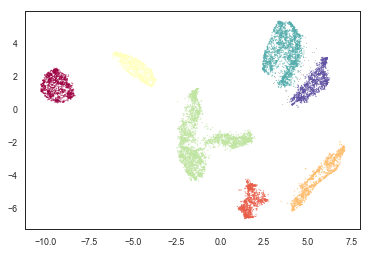

In [33]:
clustered = (HDBSCAN_labels >= 0)
plt.scatter(embedding[~clustered, 0],
            embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(embedding[clustered, 0],
            embedding[clustered, 1],
            c=HDBSCAN_labels[clustered],
            s=0.1,
            cmap='Spectral');

<span style="color:blue"> <i> 8. Evaluate the adjusted Rand score (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) and adjusted mutual information (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html) for this clustering as compared with the true labels. </i></span> <br>

(Note: Changing the hyperparameters of UMAP/HDBSCAN model and increasing the total number of sample, you can improve those scores.) 

In [35]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [36]:
print("adjusted Rand score: ", adjusted_rand_score(Y_train, HDBSCAN_labels))
print("adjusted mutual information: ", adjusted_mutual_info_score(Y_train, HDBSCAN_labels))

adjusted Rand score:  0.6235417681528613
adjusted mutual information:  0.7090363421827345


/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


***